In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Creating dataframes for stocks

In [9]:
# The stocks we'll use for this analysis (top 4 market capital banks)
stock_names = ['HDFC', 'ICICI', 'SBI', 'KOTAK']

path = "/content/drive/MyDrive/stock/"

In [10]:
# HDFC data

df1 = pd.read_csv(path + "HDFCBANK.csv")
df1.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [11]:
# HDFC data

df1.set_index("Date", drop=False, inplace=True)
HDFC = df1.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover']]
HDFC.head()

,Date,Open,High,Low,Close,VWAP,Volume,Turnover
Date,,,,,,,,
2000-01-03,2000-01-03,166.00,170.00,166.00,170.00,169.52,33259,5.638122e+11
2000-01-04,2000-01-04,182.00,183.45,171.00,173.80,174.99,168710,2.952261e+12
2000-01-05,2000-01-05,170.00,173.90,165.00,166.95,169.20,159820,2.704094e+12
2000-01-06,2000-01-06,168.00,170.00,165.30,168.30,168.44,85026,1.432166e+12
2000-01-07,2000-01-07,162.15,171.00,162.15,168.35,166.79,85144,1.420158e+12


In [12]:
# ICICI data

df2 = pd.read_csv(path + "ICICIBANK.csv")
df2.set_index("Date", drop=False, inplace=True)
ICICI = df2.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover']]
ICICI.head()

,Date,Open,High,Low,Close,VWAP,Volume,Turnover
Date,,,,,,,,
2000-01-03,2000-01-03,74.35,74.75,71.40,74.75,73.20,286260,2.095439e+12
2000-01-04,2000-01-04,73.05,78.50,71.00,73.05,73.38,296264,2.173893e+12
2000-01-05,2000-01-05,70.00,73.50,67.50,69.50,70.85,227624,1.612794e+12
2000-01-06,2000-01-06,71.00,74.00,69.55,70.05,72.04,275149,1.982121e+12
2000-01-07,2000-01-07,69.00,72.50,66.00,67.40,68.72,138809,9.538882e+11


In [13]:
# SBI data

df3 = pd.read_csv(path + "SBIN.csv")
df3.set_index("Date", drop=False, inplace=True)
SBI = df3.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover',]]
SBI.head()

,Date,Open,High,Low,Close,VWAP,Volume,Turnover
Date,,,,,,,,
2000-01-03,2000-01-03,236.00,243.65,234.25,243.65,240.83,2373228,5.715338e+13
2000-01-04,2000-01-04,243.65,262.00,238.85,259.10,251.46,4495741,1.130506e+14
2000-01-05,2000-01-05,249.00,264.70,245.00,248.45,252.35,3434058,8.666008e+13
2000-01-06,2000-01-06,252.00,268.00,252.00,261.00,262.18,6658801,1.745817e+14
2000-01-07,2000-01-07,261.50,279.90,255.00,273.30,269.02,7873985,2.118287e+14


In [14]:
# KOTAK data

df4 = pd.read_csv(path + "KOTAKBANK.csv")
df4.set_index("Date", drop=False, inplace=True)
KOTAK = df4.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover']]
KOTAK.head()

,Date,Open,High,Low,Close,VWAP,Volume,Turnover
Date,,,,,,,,
2000-01-03,2000-01-03,220.0,229.35,220.00,229.35,229.13,7086,1.623640e+11
2000-01-04,2000-01-04,247.7,247.70,225.25,246.95,244.12,73681,1.798729e+12
2000-01-05,2000-01-05,229.0,240.00,227.20,228.40,233.75,105799,2.473093e+12
2000-01-06,2000-01-06,235.1,239.00,217.00,225.90,226.84,40202,9.119546e+11
2000-01-07,2000-01-07,213.0,219.00,207.85,208.85,209.94,24463,5.135747e+11


# Exploratory Data Analysis (EDA)

In [15]:
# Summary Stats of HDFC

HDFC.describe()

,Open,High,Low,Close,VWAP,Volume,Turnover
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03
mean,1007.472767,1019.986939,993.822211,1007.330390,1006.929263,2.102580e+06,2.448837e+14
std,635.461516,641.444674,629.502818,635.675021,635.481917,3.970048e+06,4.778103e+14
min,162.150000,167.900000,157.000000,163.400000,161.400000,1.042000e+03,2.291142e+10
25%,482.112500,486.912500,473.100000,480.200000,479.512500,3.058325e+05,1.640025e+13
50%,939.350000,953.950000,922.175000,935.725000,937.455000,9.444650e+05,1.150443e+14
75%,1423.525000,1440.000000,1399.000000,1421.000000,1420.567500,2.123647e+06,2.154477e+14
max,2566.000000,2583.300000,2553.700000,2565.800000,2570.700000,1.005650e+08,1.426400e+16


In [16]:
# General info of HDFC

HDFC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5306 non-null   object 
 1   Open      5306 non-null   float64
 2   High      5306 non-null   float64
 3   Low       5306 non-null   float64
 4   Close     5306 non-null   float64
 5   VWAP      5306 non-null   float64
 6   Volume    5306 non-null   int64  
 7   Turnover  5306 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 373.1+ KB


**VWAP variations of all stocks over time**

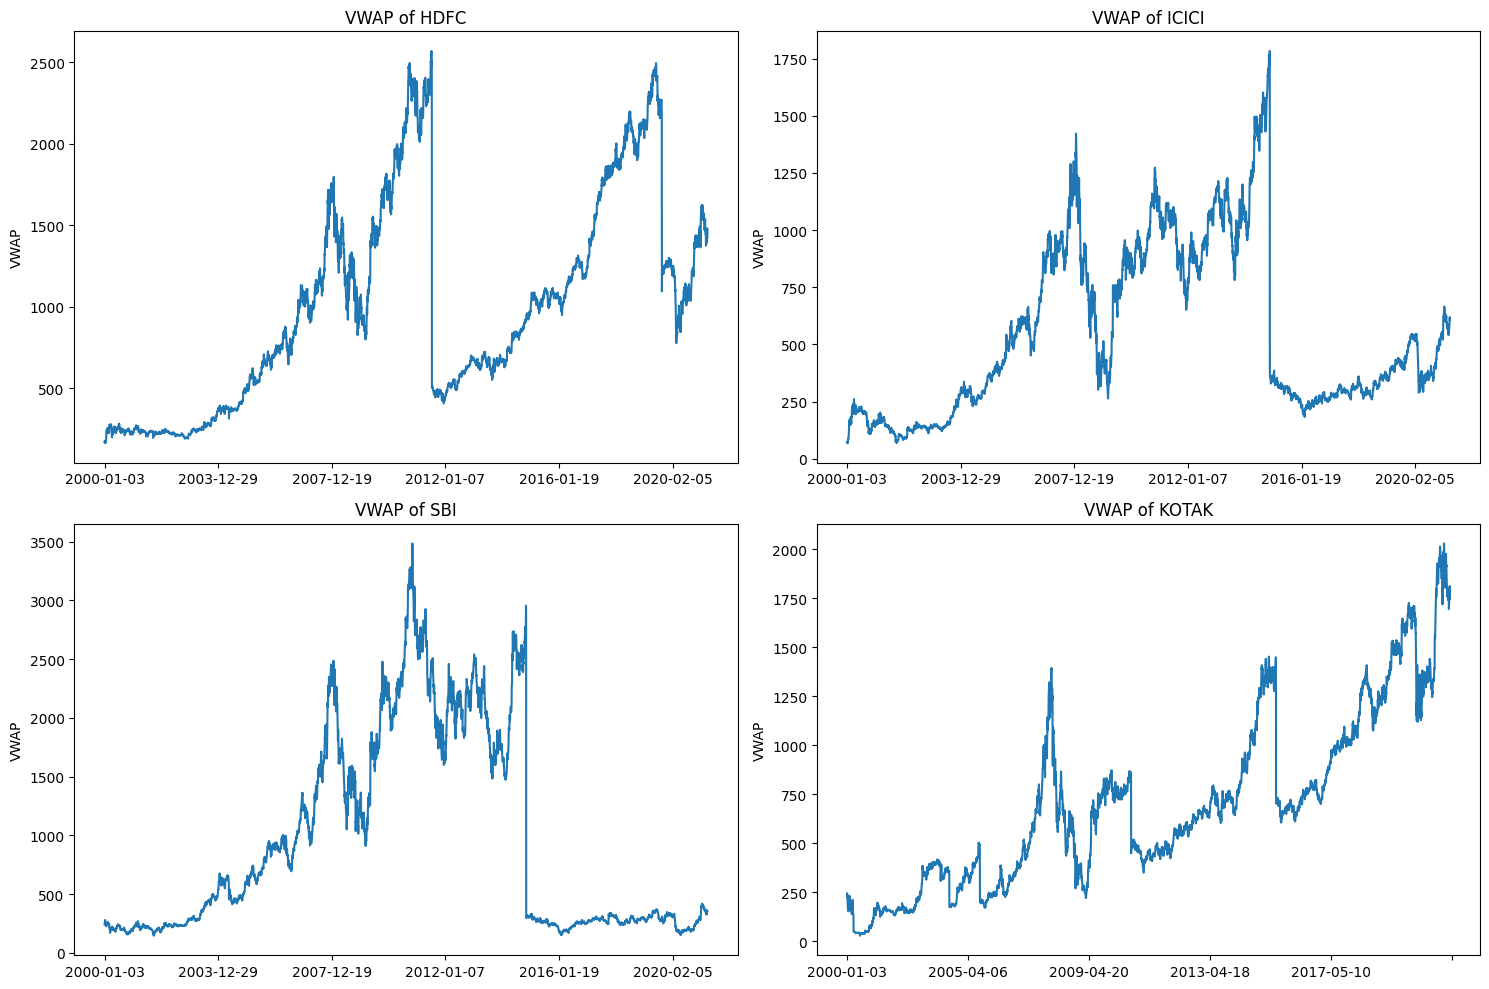

In [17]:
stock_list = [HDFC, ICICI, SBI, KOTAK]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['VWAP'].plot()
    plt.ylabel('VWAP')
    plt.xlabel(None)
    plt.title(f"VWAP of {stock_names[i - 1]}")
    
plt.tight_layout()

**Total volume of all stock being traded each day**

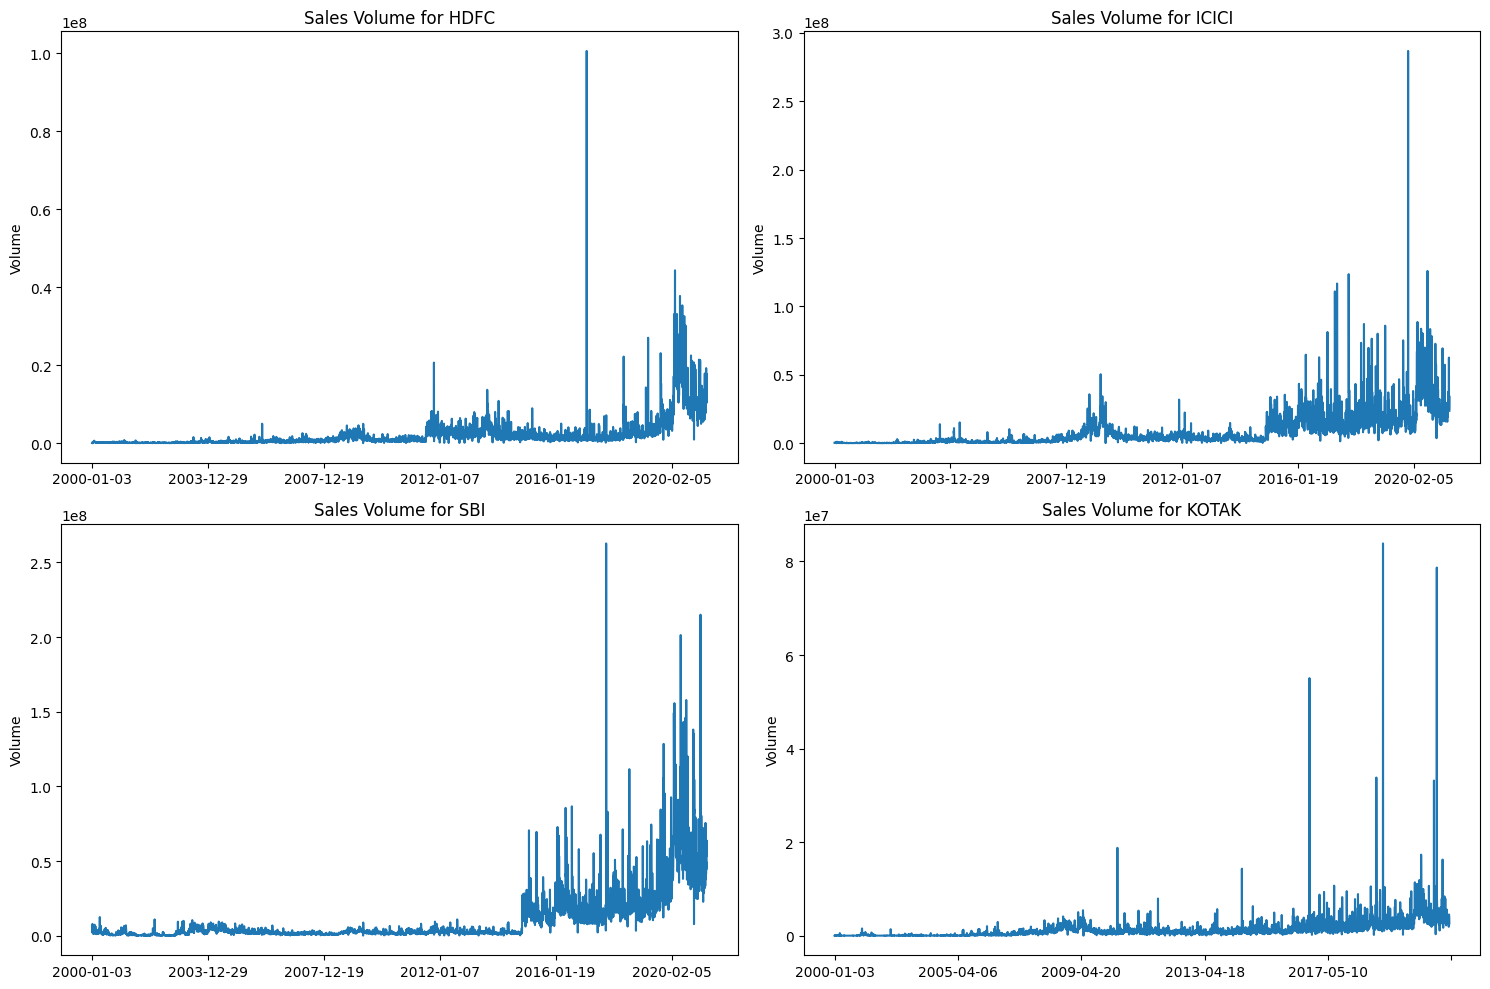

In [18]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_names[i - 1]}")
    
plt.tight_layout()

**Moving average of the all stocks**

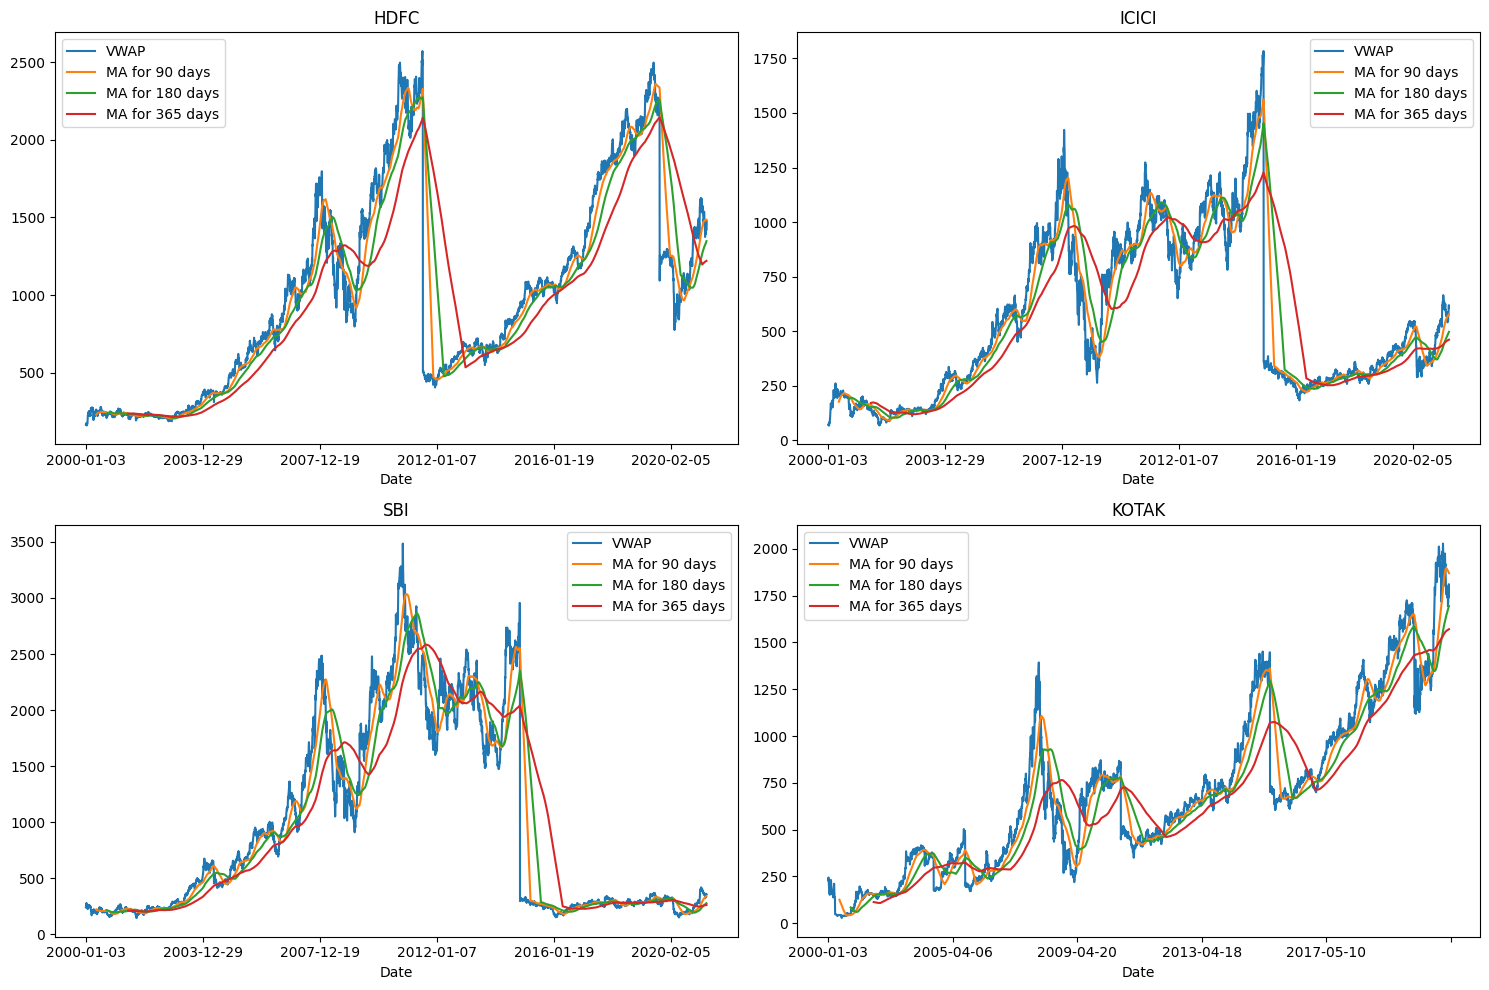

In [19]:
# average is taken over a specific period of time, like 3 months, 6 months, 1 year

ma_day = [90, 180, 365]

for ma in ma_day:
    for stock in stock_list:
        column_name = f"MA for {ma} days"
        stock[column_name] = stock['VWAP'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

HDFC[['VWAP', 'MA for 90 days', 'MA for 180 days', 'MA for 365 days']].plot(ax=axes[0,0])
axes[0,0].set_title('HDFC')

ICICI[['VWAP', 'MA for 90 days', 'MA for 180 days', 'MA for 365 days']].plot(ax=axes[0,1])
axes[0,1].set_title('ICICI')

SBI[['VWAP', 'MA for 90 days', 'MA for 180 days', 'MA for 365 days']].plot(ax=axes[1,0])
axes[1,0].set_title('SBI')

KOTAK[['VWAP', 'MA for 90 days', 'MA for 180 days', 'MA for 365 days']].plot(ax=axes[1,1])
axes[1,1].set_title('KOTAK')

fig.tight_layout()

**Daily return of the stock on average**

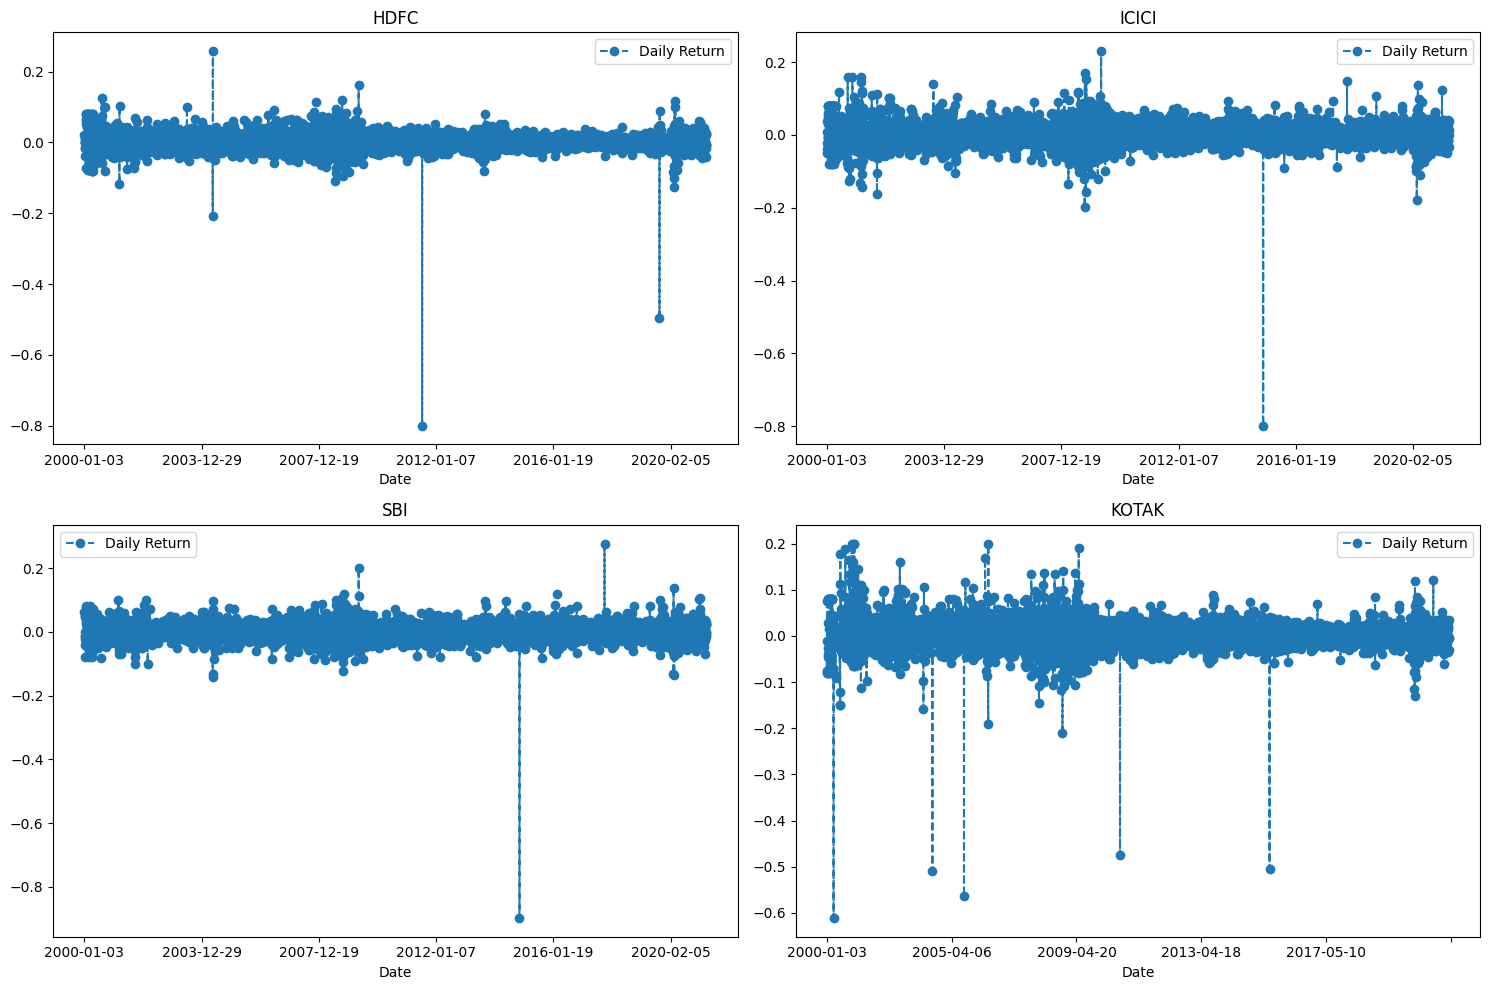

In [20]:
# using pct_change to find the percent change for each day

for stock in stock_list:
    stock['Daily Return'] = stock['Close'].pct_change()

# Then we'll plot the daily return percentage

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

HDFC['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('HDFC')

ICICI['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('ICICI')

SBI['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('SBI')

KOTAK['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('KOTAK')

fig.tight_layout()

**Average daily return using a histogram**

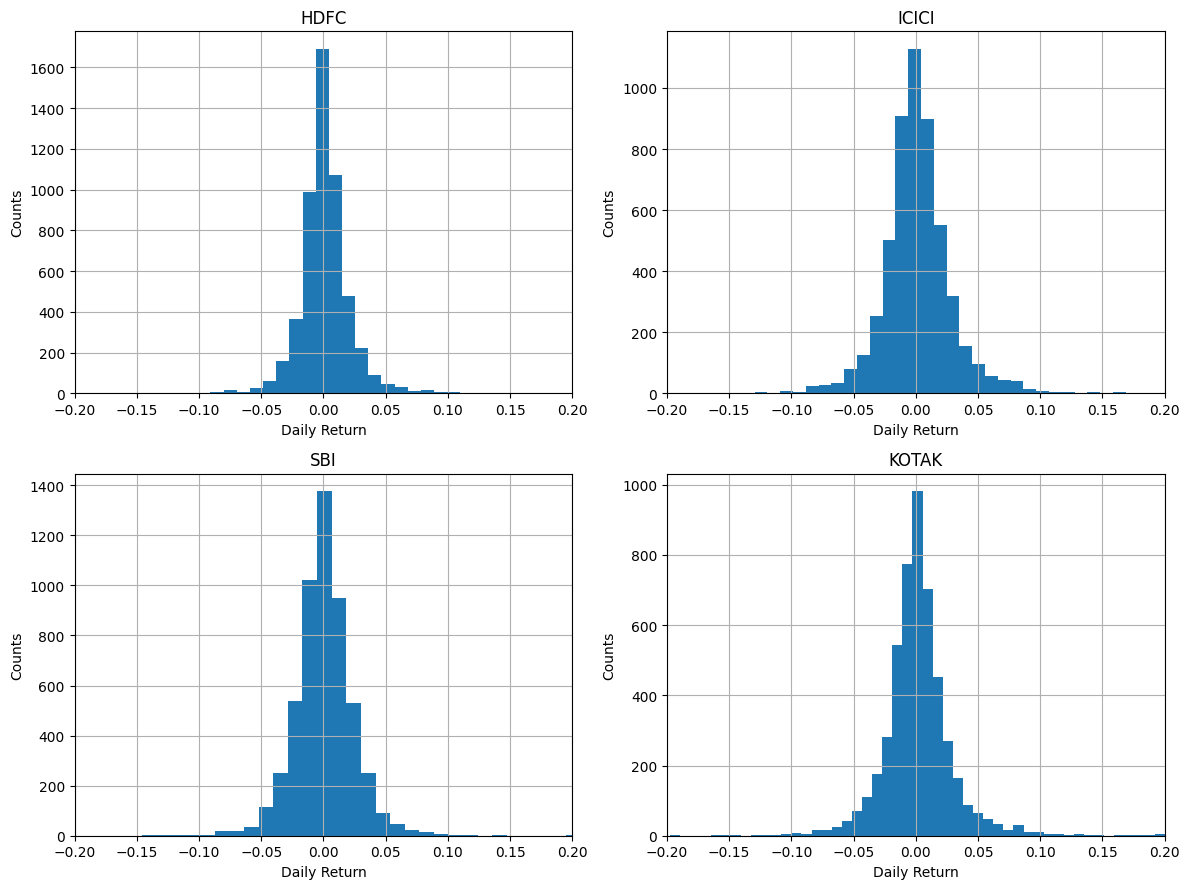

In [21]:
plt.figure(figsize=(12, 9))

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Daily Return'].hist(bins=100)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{stock_names[i - 1]}')
    plt.xlim(-0.2, 0.2)
    
plt.tight_layout()

**Correlation between different stocks closing prices**

In [22]:
VWAP_df = pd.DataFrame()

for i, stock in enumerate(stock_list, 1):
    VWAP_df[stock_names[i-1]] = stock['VWAP']
    
VWAP_df.head()

,HDFC,ICICI,SBI,KOTAK
Date,,,,
2000-01-03,169.52,73.20,240.83,229.13
2000-01-04,174.99,73.38,251.46,244.12
2000-01-05,169.20,70.85,252.35,233.75
2000-01-06,168.44,72.04,262.18,226.84
2000-01-07,166.79,68.72,269.02,209.94


In [23]:
stock_returns = VWAP_df.pct_change()
stock_returns.head()

,HDFC,ICICI,SBI,KOTAK
Date,,,,
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,0.032268,0.002459,0.044139,0.065421
2000-01-05,-0.033088,-0.034478,0.003539,-0.042479
2000-01-06,-0.004492,0.016796,0.038954,-0.029561
2000-01-07,-0.009796,-0.046086,0.026089,-0.074502


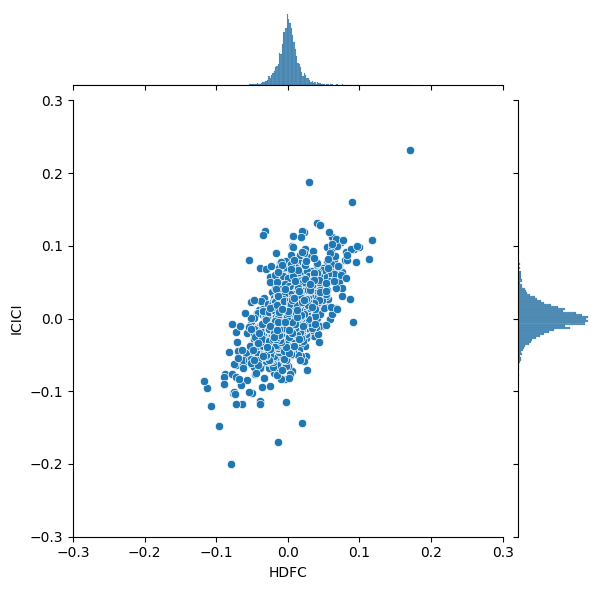

In [24]:
# using jointplot to compare the daily returns of HDFC and ICICI

plot1 = sns.jointplot(x='HDFC', y='ICICI', data=stock_returns, kind='scatter')
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)
plt.show()

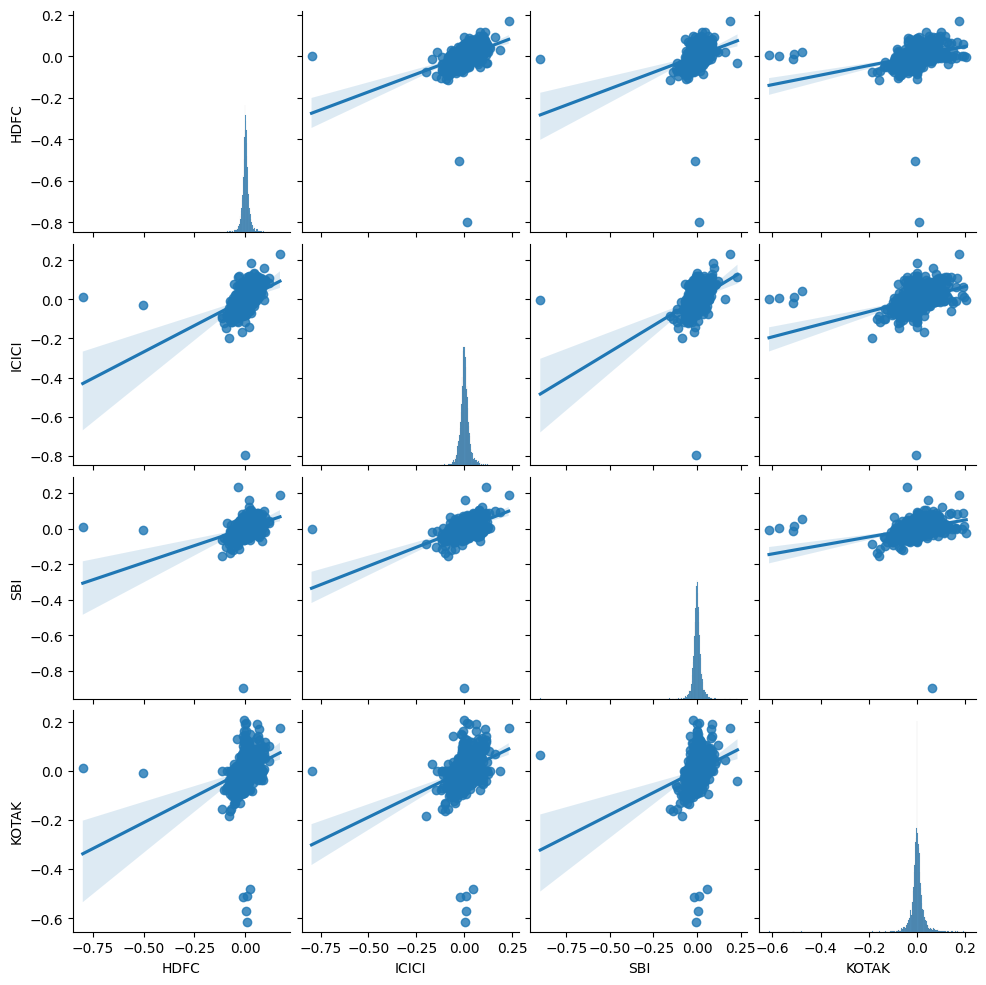

In [25]:
# correlation pairplots for daily returns

sns.pairplot(stock_returns, kind='reg')

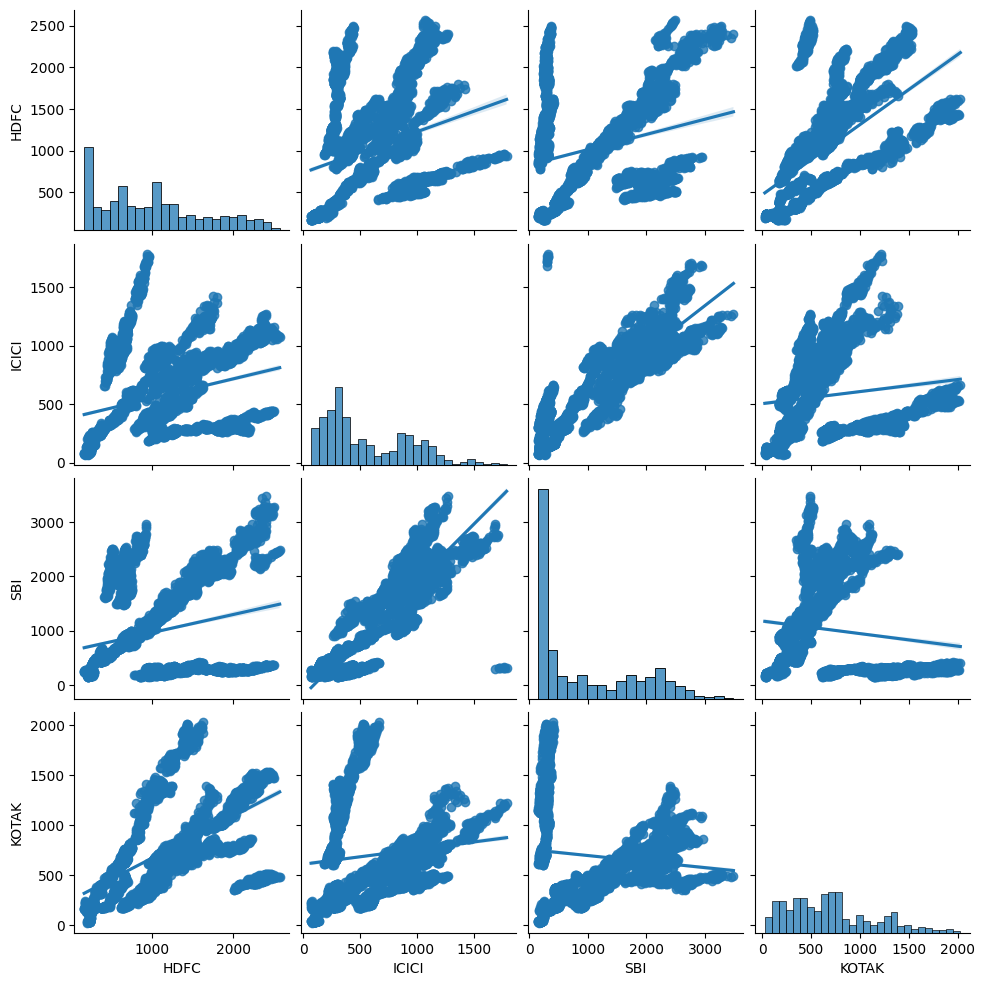

In [26]:
# correlation pairplots for VWAP

sns.pairplot(VWAP_df, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

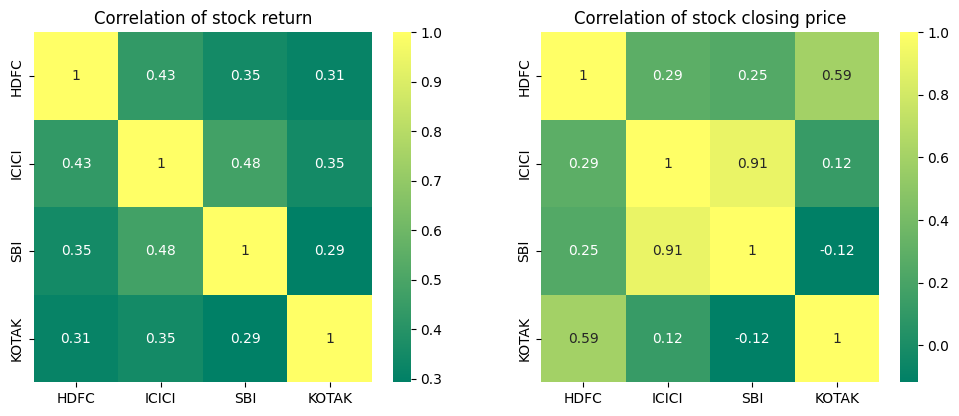

In [27]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_returns.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(VWAP_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

**Value we put at risk by investing in a particular stock**

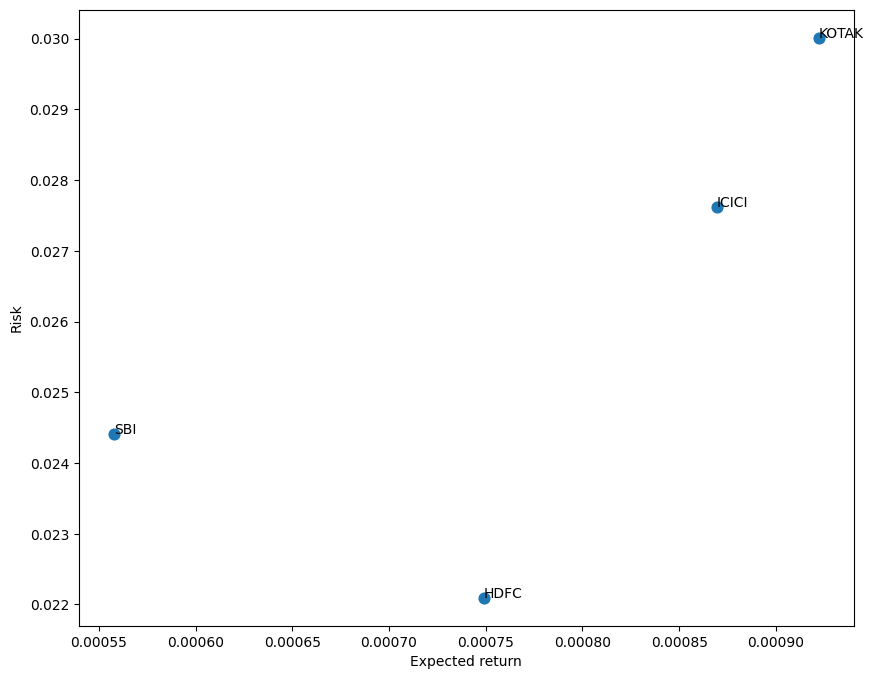

In [28]:
# by comparing the expected return with the standard deviation of the daily returns.

plt.figure(figsize=(10, 8))
plt.scatter(stock_returns.mean(), stock_returns.std(), s=60)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(stock_returns.columns, stock_returns.mean(), stock_returns.std()):
    plt.annotate(label, xy=(x, y))

# Feature Engineering

In [29]:
# feature engineering

# stock to be predicted
stock = HDFC.copy()

lag_features = ["High", "Low", "Volume", "Turnover", "Close"]
window1 = 3
window2 = 7
window3 = 30

stock.reset_index(drop=True, inplace=True)

df_rolled_3d = stock[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = stock[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = stock[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    stock[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    stock[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    stock[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]

    stock[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    stock[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    stock[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

#     stock.fillna(stock.mean(numeric_only=True), inplace=True)

stock.set_index("Date", drop=False, inplace=True)

display(stock.head())

,Date,Open,High,Low,Close,VWAP,Volume,Turnover,MA for 90 days,MA for 180 days,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,166.00,170.00,166.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,2000-01-04,182.00,183.45,171.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,...,5.638122e+11,NaN,NaN,NaN,170.000000,170.000000,170.000000,NaN,NaN,NaN
2000-01-05,2000-01-05,170.00,173.90,165.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,...,1.758037e+12,1.688889e+12,1.688889e+12,1.688889e+12,171.899994,171.899994,171.899994,2.687006,2.687006,2.687006
2000-01-06,2000-01-06,168.00,170.00,165.30,168.30,168.44,85026,1.432166e+12,NaN,NaN,...,2.073389e+12,1.313207e+12,1.313207e+12,1.313207e+12,170.250000,170.250000,170.250000,3.431836,3.431836,3.431836
2000-01-07,2000-01-07,162.15,171.00,162.15,168.35,166.79,85144,1.420158e+12,NaN,NaN,...,1.913083e+12,8.154833e+11,1.119137e+12,1.119137e+12,169.683334,169.762497,169.762497,3.628475,2.966866,2.966866


In [30]:
# adding month, week, day, day of week fields

stock.Date = pd.to_datetime(stock.Date, format="%Y-%m-%d")
stock["month"] = stock.Date.dt.month
stock["week"] = stock.Date.dt.isocalendar().week
stock["day"] = stock.Date.dt.day
stock["day_of_week"] = stock.Date.dt.dayofweek
display(stock.head())

,Date,Open,High,Low,Close,VWAP,Volume,Turnover,MA for 90 days,MA for 180 days,...,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,166.00,170.00,166.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,3,0
2000-01-04,2000-01-04,182.00,183.45,171.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,...,170.000000,170.000000,170.000000,NaN,NaN,NaN,1,1,4,1
2000-01-05,2000-01-05,170.00,173.90,165.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,...,171.899994,171.899994,171.899994,2.687006,2.687006,2.687006,1,1,5,2
2000-01-06,2000-01-06,168.00,170.00,165.30,168.30,168.44,85026,1.432166e+12,NaN,NaN,...,170.250000,170.250000,170.250000,3.431836,3.431836,3.431836,1,1,6,3
2000-01-07,2000-01-07,162.15,171.00,162.15,168.35,166.79,85144,1.420158e+12,NaN,NaN,...,169.683334,169.762497,169.762497,3.628475,2.966866,2.966866,1,1,7,4


In [31]:
# exogenous features

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3","High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7","High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Close_mean_lag3", "Close_mean_lag7","Close_mean_lag30","Close_std_lag3","Close_std_lag7","Close_std_lag30",
                      "Turnover_std_lag30","month","week","day","day_of_week"]

In [32]:
stock.dropna(inplace=True)
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4942 entries, 2001-06-15 to 2021-04-30
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4942 non-null   datetime64[ns]
 1   Open                 4942 non-null   float64       
 2   High                 4942 non-null   float64       
 3   Low                  4942 non-null   float64       
 4   Close                4942 non-null   float64       
 5   VWAP                 4942 non-null   float64       
 6   Volume               4942 non-null   int64         
 7   Turnover             4942 non-null   float64       
 8   MA for 90 days       4942 non-null   float64       
 9   MA for 180 days      4942 non-null   float64       
 10  MA for 365 days      4942 non-null   float64       
 11  Daily Return         4942 non-null   float64       
 12  High_mean_lag3       4942 non-null   float32       
 13  High_mean_lag7       49

In [33]:
stock['Volume'] = stock['Volume'].astype('float64')
cols = ['month', 'week', 'day', 'day_of_week']
stock[cols] = stock[cols].astype('float32')

stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4942 entries, 2001-06-15 to 2021-04-30
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4942 non-null   datetime64[ns]
 1   Open                 4942 non-null   float64       
 2   High                 4942 non-null   float64       
 3   Low                  4942 non-null   float64       
 4   Close                4942 non-null   float64       
 5   VWAP                 4942 non-null   float64       
 6   Volume               4942 non-null   float64       
 7   Turnover             4942 non-null   float64       
 8   MA for 90 days       4942 non-null   float64       
 9   MA for 180 days      4942 non-null   float64       
 10  MA for 365 days      4942 non-null   float64       
 11  Daily Return         4942 non-null   float64       
 12  High_mean_lag3       4942 non-null   float32       
 13  High_mean_lag7       49

# Normalization (MinMax scaling) and test-train splitting

In [34]:
# min max scaling(normalization) and train-test data splitting

train_len = len(stock[stock.Date < '2019'])

X = stock.loc[:, exogenous_features].reset_index(drop=True)
y = stock.loc[:, 'VWAP'].reset_index(drop=True)

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train = X_scaled[0:train_len, :]
y_train = y_scaled[0:train_len, :]

X_test = X_scaled[train_len:, :]
y_test = y_scaled[train_len:, :]

# LSTM models

In [35]:
def lstm_model(lstm_layers, dense_layers, batch_input_shape):
    
    model = Sequential()
    
    if len(lstm_layers)==1:
        model.add(LSTM(lstm_layers[0], batch_input_shape=batch_input_shape))
    
    else:
        
        model.add(LSTM(lstm_layers[0], batch_input_shape=batch_input_shape, return_sequences=True))

        for units in lstm_layers[1:-1]:
            model.add(LSTM(units, return_sequences=True))
            
        model.add(LSTM(lstm_layers[-1], return_sequences=False))

    for units in dense_layers:
        model.add(Dense(units))

    # compile the model

    model.compile(loss='mean_squared_error', optimizer='adam')

    # return the model

    return model

    
def evaluate_model(model, X_train, y_train, X_test, y_test, nb_epoch, batch_size):
    
    # train the model
    
    history = model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size, 
                        validation_data=(X_test, y_test), 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
                        verbose=0, shuffle=False)
    
    print_loss(history)
    
    model.summary()

    # predict
    
    y_pred = model.predict(X_test, batch_size=batch_size)

    return y_pred


def compute_errors(y_test, y_pred):

    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f'\nRMSE: {rmse} MAE: {mae}')
    
def print_loss(history):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='best')
    plt.show();

In [36]:
batch_size = 1 # number of sequences
timesteps = 1
nb_epoch = 40

In [37]:
X_train = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

In [38]:
X_train.shape

(4365, 1, 34)

In [39]:
# (number of Sequences, time steps, number of Features) 

batch_input_shape = (batch_size, X_train.shape[1], X_train.shape[2])
batch_input_shape

(1, 1, 34)

# LSTM model 1

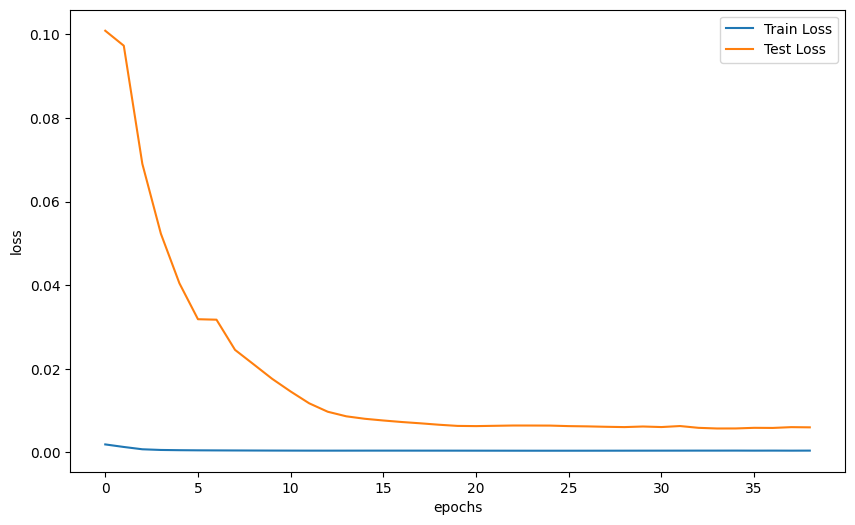

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 32)                   8576      
                                                                 
 dense (Dense)               (1, 1)                    33        
                                                                 
Total params: 8,609
Trainable params: 8,609
Non-trainable params: 0
_________________________________________________________________
577/577 [==============================] - 1s 1ms/step

RMSE: 184.7486769535937 MAE: 146.7294873089187


In [40]:
# build LSTM model with 
# LSTM layer of 32 units
# Dense layer of 1 unit 

lstm1 = lstm_model([32], [1], batch_input_shape)

y_pred1 = evaluate_model(lstm1, X_train, y_train, X_test, y_test, nb_epoch, batch_size)

y_pred1_ac = scaler_y.inverse_transform(y_pred1)

y_test_ac = y[train_len:]

compute_errors(y_test_ac, y_pred1_ac)

<Axes: xlabel='Date'>

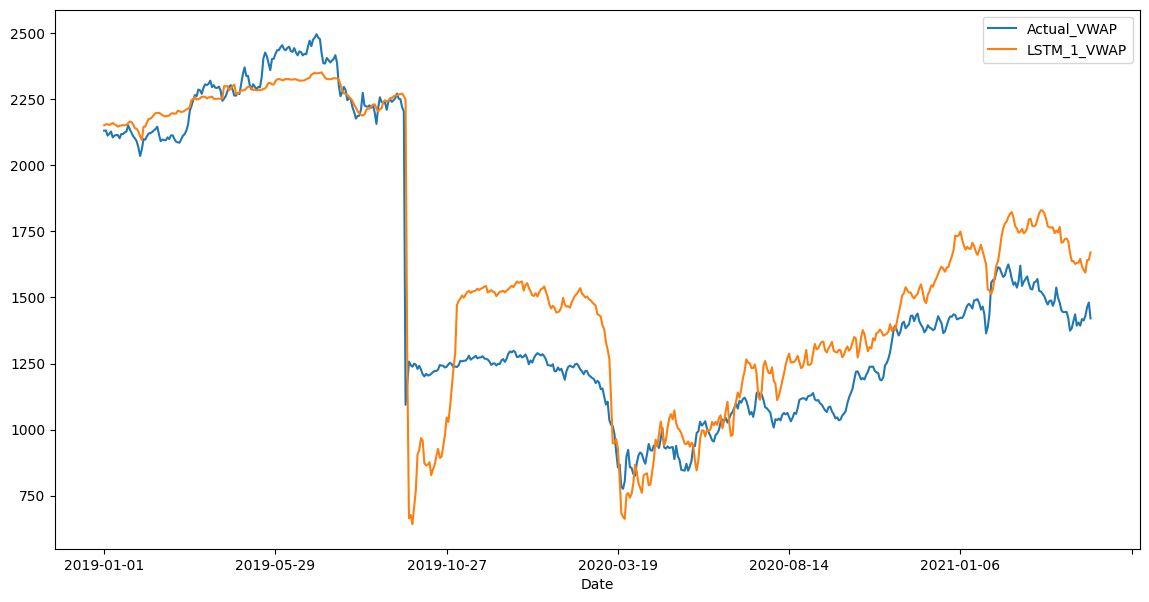

In [41]:
results = pd.DataFrame({'Actual_VWAP':y_test_ac.values}, index=stock.index[train_len: ])

results['LSTM_1_VWAP'] = y_pred1_ac

results[["Actual_VWAP", "LSTM_1_VWAP"]].plot(figsize=(14, 7))

# LSTM model 2

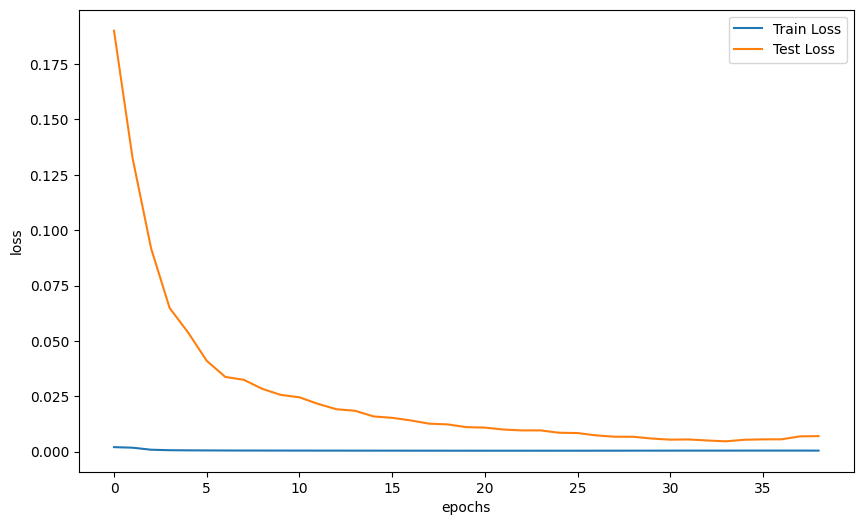

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 64)                   25344     
                                                                 
 dense_1 (Dense)             (1, 1)                    65        
                                                                 
Total params: 25,409
Trainable params: 25,409
Non-trainable params: 0
_________________________________________________________________
577/577 [==============================] - 1s 1ms/step

RMSE: 199.2894279604245 MAE: 170.94401654909552


In [42]:
# build LSTM model with
# LSTM layer of 64 units 
# Dense layer of 1 unit 

lstm2 = lstm_model([64], [1], batch_input_shape)

y_pred2 = evaluate_model(lstm2, X_train, y_train, X_test, y_test, nb_epoch, batch_size)

y_pred2_ac = scaler_y.inverse_transform(y_pred2)

compute_errors(y_test_ac, y_pred2_ac)

<Axes: xlabel='Date'>

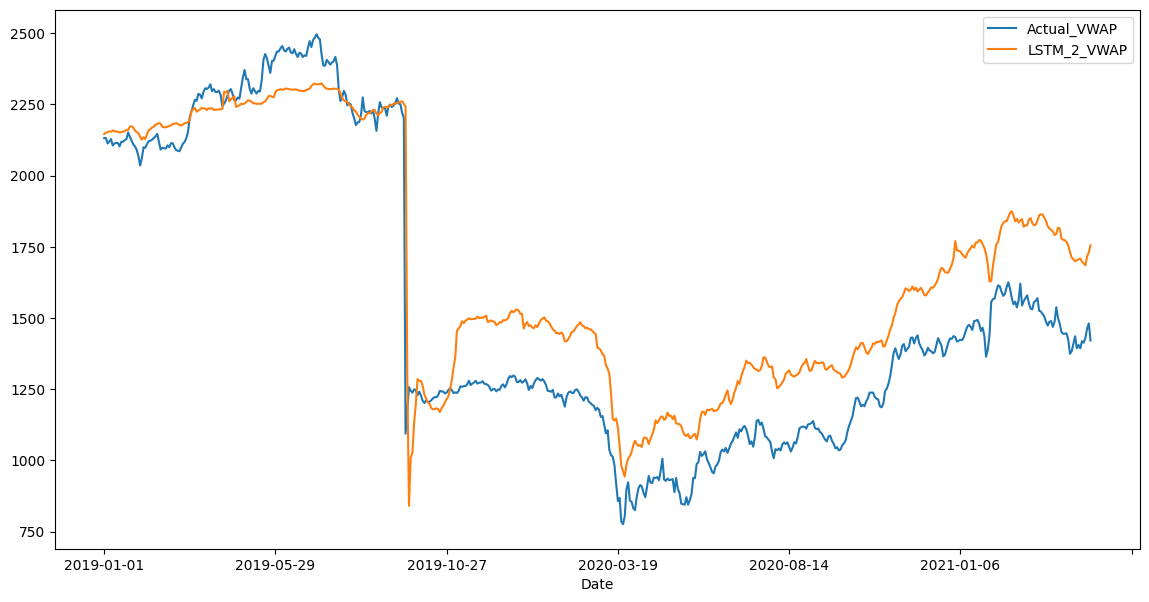

In [43]:
results['LSTM_2_VWAP'] = y_pred2_ac

results[["Actual_VWAP", "LSTM_2_VWAP"]].plot(figsize=(14, 7))

# LSTM model 3

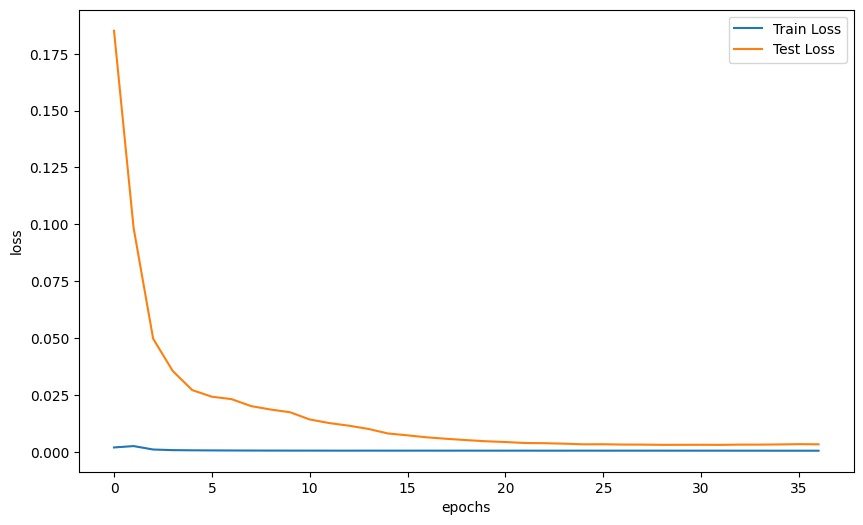

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (1, 1, 64)                25344     
                                                                 
 lstm_3 (LSTM)               (1, 32)                   12416     
                                                                 
 dense_2 (Dense)             (1, 1)                    33        
                                                                 
Total params: 37,793
Trainable params: 37,793
Non-trainable params: 0
_________________________________________________________________
577/577 [==============================] - 2s 2ms/step

RMSE: 136.62433933516644 MAE: 87.1861125831009


In [44]:
# build LSTM model with
# two LSTM layer of 64, 32 units 
# Dense layer of 1 units 

lstm3 = lstm_model([64, 32], [1], batch_input_shape)

y_pred3 = evaluate_model(lstm3, X_train, y_train, X_test, y_test, nb_epoch, batch_size)

y_pred3_ac = scaler_y.inverse_transform(y_pred3)

compute_errors(y_test_ac, y_pred3_ac)

<Axes: xlabel='Date'>

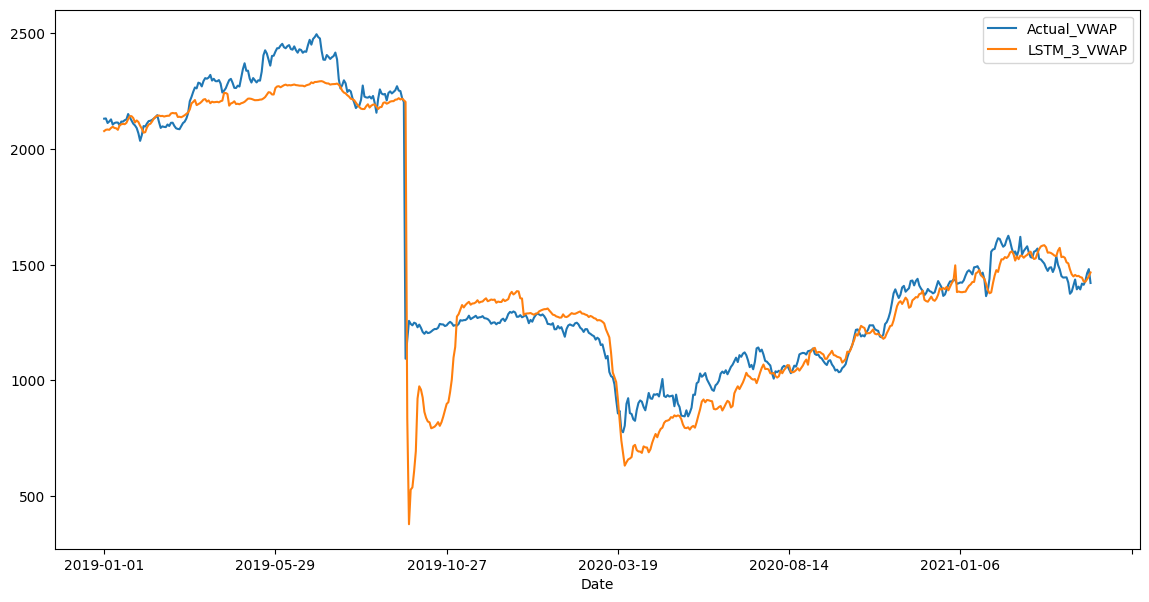

In [45]:
results['LSTM_3_VWAP'] = y_pred3_ac

results[["Actual_VWAP", "LSTM_3_VWAP"]].plot(figsize=(14, 7))

# LSTM model 4

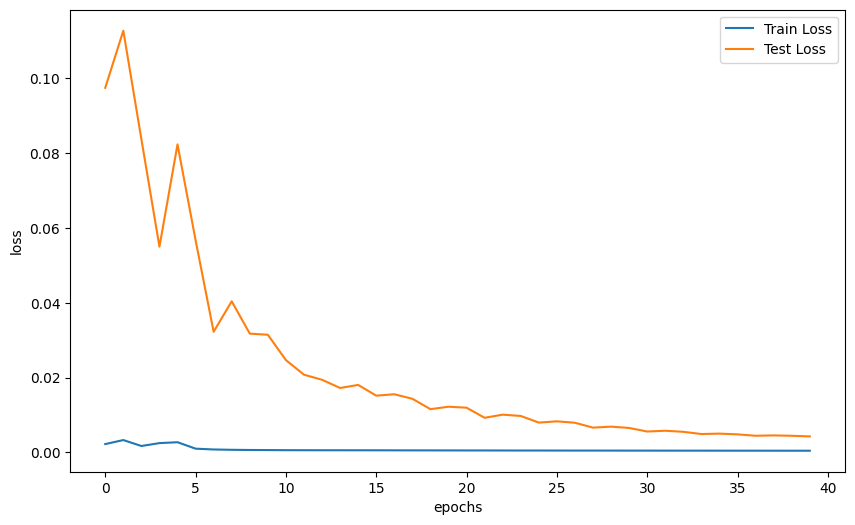

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (1, 1, 64)                25344     
                                                                 
 lstm_7 (LSTM)               (1, 1, 32)                12416     
                                                                 
 lstm_8 (LSTM)               (1, 1, 32)                8320      
                                                                 
 lstm_9 (LSTM)               (1, 32)                   8320      
                                                                 
 dense_5 (Dense)             (1, 1)                    33        
                                                                 
Total params: 54,433
Trainable params: 54,433
Non-trainable params: 0
_________________________________________________________________
577/577 [==============================] - 3s 2ms/

In [47]:
# build LSTM model with
# four LSTM layer of 64 and 32 units
# Dense layer of 1 units 

lstm4 = lstm_model([64, 32, 32, 32], [1], batch_input_shape)

y_pred4 = evaluate_model(lstm4, X_train, y_train, X_test, y_test, nb_epoch, batch_size)

y_pred4_ac = scaler_y.inverse_transform(y_pred4)

compute_errors(y_test_ac, y_pred4_ac)

<Axes: xlabel='Date'>

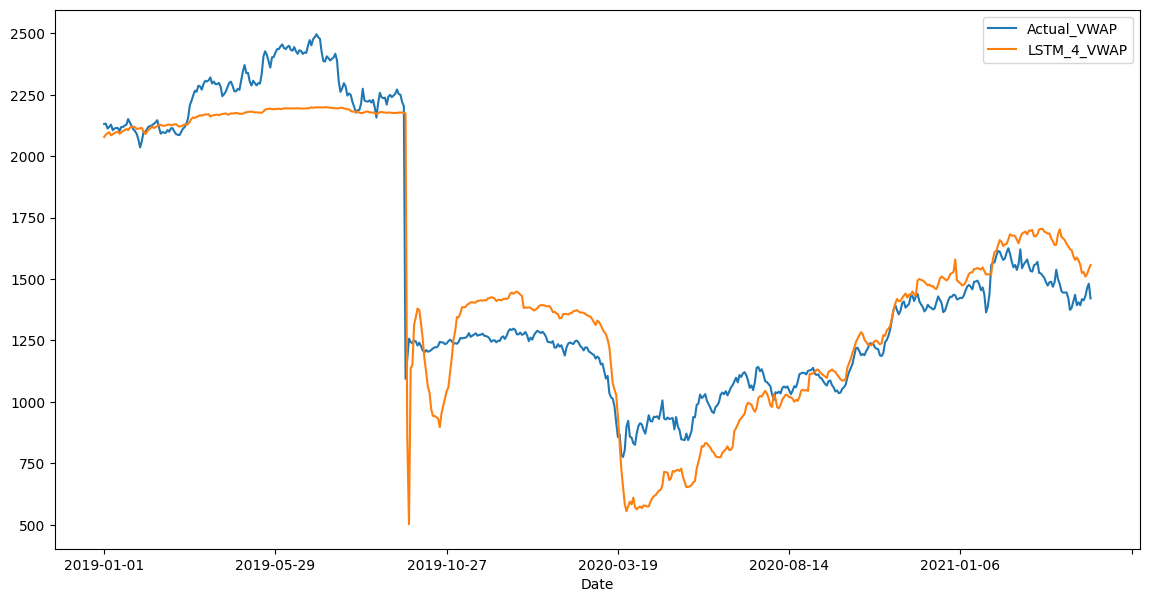

In [48]:
results['LSTM_4_VWAP'] = y_pred4_ac

results[["Actual_VWAP", "LSTM_4_VWAP"]].plot(figsize=(14, 7))

# Simple RNN model

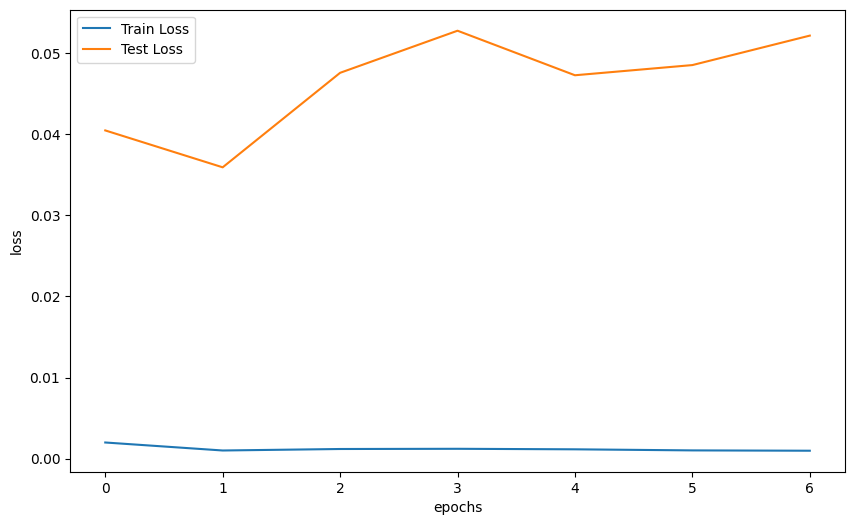

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (1, 64)                   6336      
                                                                 
 dense_6 (Dense)             (1, 16)                   1040      
                                                                 
 dense_7 (Dense)             (1, 1)                    17        
                                                                 
Total params: 7,393
Trainable params: 7,393
Non-trainable params: 0
_________________________________________________________________
577/577 [==============================] - 1s 2ms/step

RMSE: 544.0689815135925 MAE: 468.64420245985434


In [49]:
# build Simple RNN model with
# simple RNN layer of 64 units
# two Dense layers of 16, 1 units 


rnn = Sequential()

rnn.add(SimpleRNN(64, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2])))

rnn.add(Dense(16))

rnn.add(Dense(1))

rnn.compile(loss='mean_squared_error', optimizer='adam')

y_pred5 = evaluate_model(rnn, X_train, y_train, X_test, y_test, nb_epoch, batch_size)

y_pred5_ac = scaler_y.inverse_transform(y_pred5)

compute_errors(y_test_ac, y_pred5_ac)

<Axes: xlabel='Date'>

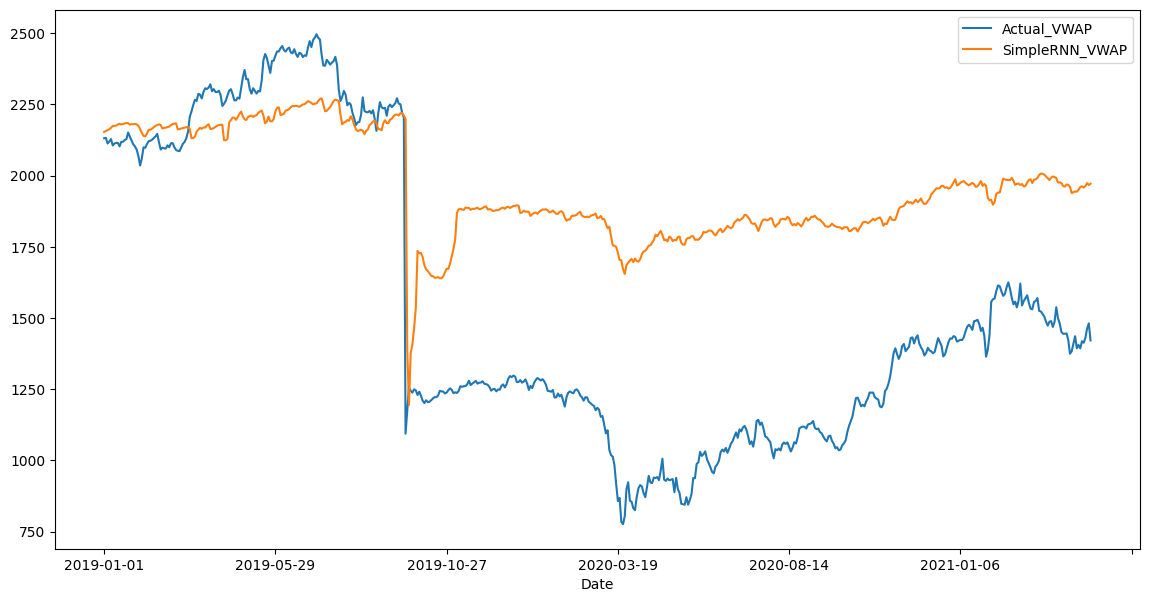

In [50]:
results['SimpleRNN_VWAP'] = y_pred5_ac

results[["Actual_VWAP", "SimpleRNN_VWAP"]].plot(figsize=(14, 7))

# fbprophet model

In [51]:
stock_train = stock[stock.Date < '2019']
stock_test = stock[stock.Date >= '2019']

fbp = prophet.Prophet()

for feature in exogenous_features:
    fbp.add_regressor(feature)

fbp.fit(stock_train[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds", "VWAP": "y"}))

y_pred6 = fbp.predict(stock_test[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds"}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxo3y0fj5/42q_uqhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxo3y0fj5/jvpi5ow9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97771', 'data', 'file=/tmp/tmpxo3y0fj5/42q_uqhj.json', 'init=/tmp/tmpxo3y0fj5/jvpi5ow9.json', 'output', 'file=/tmp/tmpxo3y0fj5/prophet_model6s4_ea9v/prophet_model-20230406081330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:13:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



RMSE: 55.39276808896882 MAE: 24.66421815607314


<Axes: xlabel='Date'>

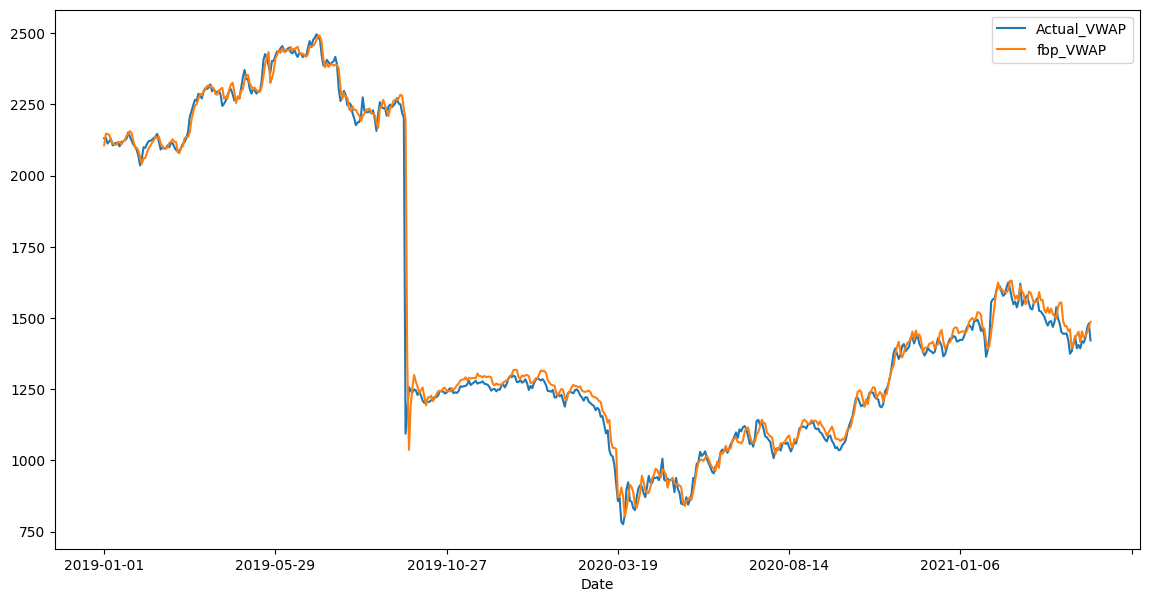

In [52]:
compute_errors(y_test_ac, y_pred6.yhat.values)

results["fbp_VWAP"] = y_pred6.yhat.values

results[["Actual_VWAP", "fbp_VWAP"]].plot(figsize=(14, 7))

# Conclusions

RNN performs poorly, in comparison to LTSM model. When we move from RNN to LSTM, we are introducing more & more controlling knobs, which control the flow and mixing of Inputs as per trained Weights. And thus, bringing in more flexibility in controlling the outputs. Thus, we obtain better results in LTSM.

Auto ARIMAX is a great baseline model but newer algorithms like Facebook's Prophet are extremely powerful.

Lag-based features are very useful in providing trends information about the time series data. Rolling statistics are a common way of generating these.

Exogenous regressors help in providing external information about the time series. They tend to be very important in most models.

Converting a time series to stationary and then modelling is a common approach for building solutions and can significantly improve results.

<Axes: xlabel='Date'>

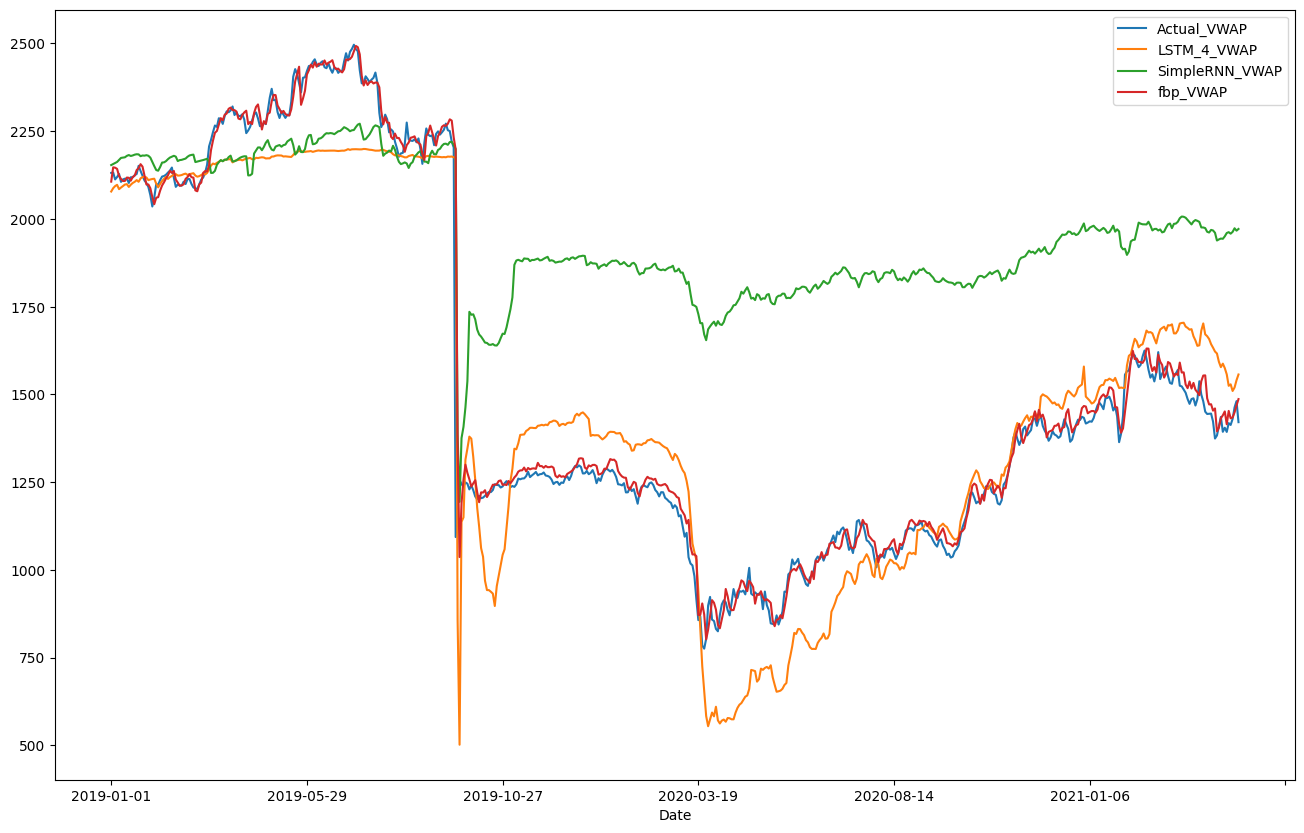

In [53]:
results[["Actual_VWAP", "LSTM_4_VWAP", "SimpleRNN_VWAP", "fbp_VWAP"]].plot(figsize=(16, 10))

LSTM1 1 lstm layer (32)              RMSE: 184.7486769535937 MAE: 146.7294873089187

LSTM2 1 lstm layer (64)              RMSE: 199.2894279604245 MAE: 170.94401654909552

LSTM3 2 lstm layers (64, 32)         RMSE: 136.62433933516644 MAE: 87.1861125831009

LSTM4 4 lstm layers (64, 32, 32, 32) RMSE: 156.127796367957 MAE: 123.4315626840575

SimpleRNN 1 rnn layer (64)           RMSE: RMSE: 544.0689815135925 MAE: 468.64420245985434

fbprophet                            RMSE: 55.80324472922854 MAE: 25.463452949787857